#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
data.shape

(506, 13)

In [3]:
feature_names = boston['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
target = boston.target
target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
def reduce_mem_usage(X):
    start_mem = X.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in X.columns:
        col_type = X[col].dtype
        if col_type !=object:
            c_min = X[col].min()
            c_max = X[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    X[col] = X[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    X[col] = X[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    X[col] = X[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    X[col] = X[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    X[col] = X[col].astype(np.float32)
                else:
                    X[col] = X[col].astype(np.float64)
        else:
            X[col] = X[col].astype('category')
    end_mem = X.memory_usage().sum() / 1024**2
    print ('Memory usage after optimization is: {:.2f}MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100*(start_mem - end_mem)/start_mem))
    return X     
X = reduce_mem_usage(X)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03MB
Decreased by 49.9%


In [8]:
y = pd.DataFrame(target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# отмасштабируем данные с помощью стандартизации
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [12]:
# число признаков стало равным 2.


In [13]:
# Визиализируем полученные данные
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

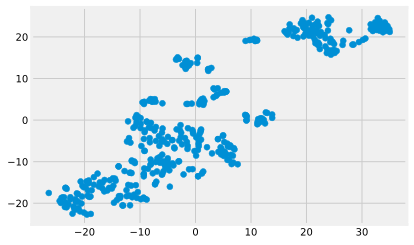

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100)

In [16]:
train_labels = model.fit_predict(X_train)
train_labels

array([2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1,

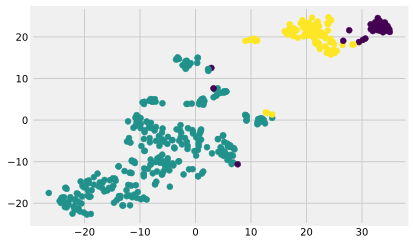

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [18]:
y_train.mean()

price    22.796535
dtype: float64

In [19]:
print('Кластер 0: {}'.format(y_train[train_labels == 0].mean()))
print('Кластер 1: {}'.format(y_train[train_labels == 1].mean()))
print('Кластер 2: {}'.format(y_train[train_labels == 2].mean()))

Кластер 0: price    13.196774
dtype: float64
Кластер 1: price    25.168687
dtype: float64
Кластер 2: price    17.442105
dtype: float64


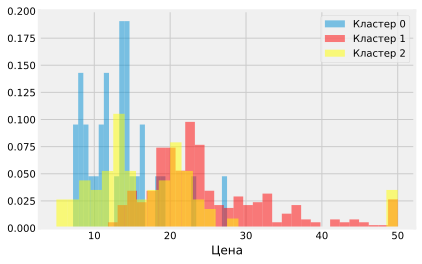

In [20]:
 #Изобразим полученные данные графически
plt.hist(y_train[train_labels == 0], bins=30, density=True, alpha=0.5)
plt.hist(y_train[train_labels == 1], bins=30, density=True, alpha=0.5, color = 'red')
plt.hist(y_train[train_labels == 2], bins=30, density=True, alpha=0.5, color = 'yellow')

plt.legend(['Кластер 0', 'Кластер 1','Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [21]:
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Кластер 0: 14.360379219055176
Кластер 1: 0.4048629105091095
Кластер 2: 11.745661735534668


In [22]:
# В кластере 1 средняя по криминальности значительно меньше, чем в других кластерах. 
# Очевидно, что средняя цена в кластере 1 выше, чем в других.

Text(0.5, 0, 'Криминальность места')

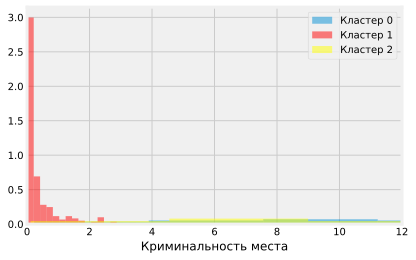

In [23]:
#Изобразим полученные данные графически
plt.hist(X_train.loc[train_labels == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[train_labels == 1, 'CRIM'], bins=20, density=True, alpha=0.5, color = 'red')
plt.hist(X_train.loc[train_labels == 2, 'CRIM'], bins=20, density=True, alpha=0.5, color = 'yellow')

plt.xlim(0,12)
plt.legend(['Кластер 0', 'Кластер 1','Кластер 2'])
plt.xlabel('Криминальность места')


#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [24]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


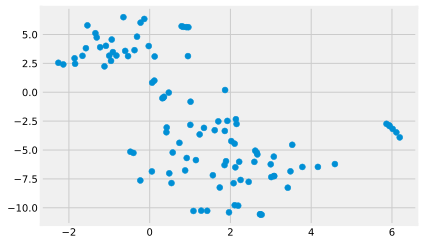

In [25]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

In [26]:
test_labels = model.fit_predict(X_test)
test_labels

array([1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1])

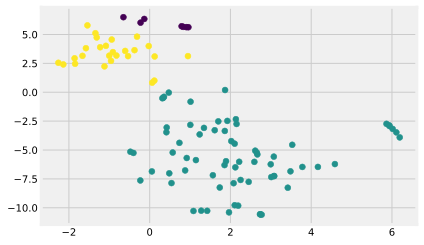

In [27]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [28]:
y_test.mean()

price    21.488235
dtype: float64

In [29]:
print('Кластер 0: {}'.format(y_test[test_labels == 0].mean()))
print('Кластер 1: {}'.format(y_test[test_labels == 1].mean()))
print('Кластер 2: {}'.format(y_test[test_labels == 2].mean()))

Кластер 0: price    12.814286
dtype: float64
Кластер 1: price    23.911594
dtype: float64
Кластер 2: price    17.392308
dtype: float64


In [30]:
print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Кластер 0: 19.021665573120117
Кластер 1: 0.24642117321491241
Кластер 2: 8.469301223754883


In [31]:
# тестовая выборка имеет такую же закономерность, что и на трейне: 
# В кластере 0 - самая высокая криминальность и низкая цена, а в первом - высокая цена и низкая криминальность.